In [2]:
# This notebook is based on the course offered on Udemy
# https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/

In [3]:
# Unzip the downloaded file 
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
import os 

#walk through the pizza steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} images in '{dirpath}'.")

There are 2 images in 'pizza_steak'.
There are 2 images in 'pizza_steak\test'.
There are 0 images in 'pizza_steak\test\pizza'.
There are 0 images in 'pizza_steak\test\steak'.
There are 2 images in 'pizza_steak\train'.
There are 0 images in 'pizza_steak\train\pizza'.
There are 0 images in 'pizza_steak\train\steak'.


In [6]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [18]:
#get the class names programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectory

print(class_names)

['pizza' 'steak']


In [8]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the image, and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['1944600.jpg']
Image shape: (306, 512, 3)


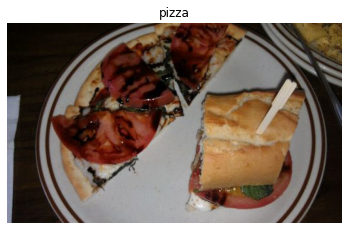

In [9]:
#
image_rand = view_random_image(target_dir = "pizza_steak/train/",
                               target_class="pizza")

In [10]:
#The images weve imported are actually giant arrays/tensors of different pixel values 
import tensorflow as tf
tf.constant(image_rand)

<tf.Tensor: shape=(306, 512, 3), dtype=uint8, numpy=
array([[[  4,   5,   0],
        [  4,   5,   0],
        [  4,   5,   0],
        ...,
        [ 72,  53,  23],
        [ 62,  42,  15],
        [ 46,  29,   1]],

       [[  4,   5,   0],
        [  4,   5,   0],
        [  4,   5,   0],
        ...,
        [ 76,  57,  27],
        [ 78,  59,  29],
        [ 65,  45,  18]],

       [[  4,   5,   0],
        [  4,   5,   0],
        [  4,   5,   0],
        ...,
        [ 76,  55,  24],
        [ 78,  59,  29],
        [ 66,  47,  17]],

       ...,

       [[138, 140, 165],
        [137, 139, 164],
        [135, 139, 164],
        ...,
        [ 22,  13,   6],
        [ 23,  14,   7],
        [ 23,  14,   7]],

       [[138, 140, 163],
        [138, 140, 165],
        [131, 135, 160],
        ...,
        [ 21,  14,   6],
        [ 20,  13,   5],
        [ 20,  13,   5]],

       [[139, 141, 164],
        [138, 140, 165],
        [131, 135, 160],
        ...,
        [ 21,  14,   

In [11]:
#get all the pixel values between 0 and 1
image_rand/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        ...,
        [0.28235294, 0.20784314, 0.09019608],
        [0.24313725, 0.16470588, 0.05882353],
        [0.18039216, 0.11372549, 0.00392157]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        ...,
        [0.29803922, 0.22352941, 0.10588235],
        [0.30588235, 0.23137255, 0.11372549],
        [0.25490196, 0.17647059, 0.07058824]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        ...,
        [0.29803922, 0.21568627, 0.09411765],
        [0.30588235, 0.23137255, 0.11372549],
        [0.25882353, 0.18431373, 0.06666667]],

       ...,

       [[0.54117647, 0.54901961, 0.64705882],
        [0.5372549 , 0.54509804, 0.64313725],
        [0.52941176, 0

## End to end example

Convolutional Neural network to find patterns in our images, more specifically we need way to

* load our images
* preprocess our images
* build a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to our training data

In [23]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our directories
train_dir = "C:\\Users\\alexc\\ML Learning\\Neural-Network-Practice\\pizza_steak\\train" 
test_dir = "C:\\Users\\alexc\\ML Learning\\Neural-Network-Practice\\pizza_steak\\test" 

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), #This layers is the same as the one above
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 31s 639ms/step - loss: 0.5598 - accuracy: 0.7107 - val_loss: 0.4252 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 24s 509ms/step - loss: 0.4190 - accuracy: 0.8120 - val_loss: 0.3767 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.3851 - accuracy: 0.8347 - val_loss: 0.3222 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 23s 480ms/step - loss: 0.3510 - accuracy: 0.8507 - val_loss: 0.3347 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.3483 - accuracy: 0.8540 - val_loss: 0.3543 - val_accuracy: 0.8540


In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using another model to try to fit the data

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is going to be from the tensorflow website

In [26]:
#set random seed 
tf.random.set_seed(42)

#create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 274ms/step - loss: 1.8364 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 280ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [27]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [30]:
#set random seed 
tf.random.set_seed(42)

#same model as model_2, but adding more neurons per layer, and an extra layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 278ms/step - loss: 4.1289 - accuracy: 0.6193 - val_loss: 0.7806 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.6921 - accuracy: 0.6880 - val_loss: 0.5457 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6158 - accuracy: 0.7207 - val_loss: 0.5935 - val_accuracy: 0.7440
Epoch 4/5
47/47 [==============================] - 13s 286ms/step - loss: 0.8102 - accuracy: 0.6913 - val_loss: 0.5062 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 13s 281ms/step - loss: 0.5343 - accuracy: 0.7680 - val_loss: 0.5108 - val_accuracy: 0.7480


In [31]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
